# Introducción

En el modelo de regresión lineal simple nos preocupa estimar los parámetros poblacionales $\beta_1$ y $\beta_2$. Donde, con base en el supuesto de que conocemos el modelo subyacente, intentamos dar una relación causal:

$$y_t = \beta_1 + \beta_2 x_t + u_t$$

Debemos encontrar estimadores de $\beta_1$ y $\beta_2$ dado una muestra de tamaño T. Por lo que para encontrar la mejor recta que se ajuste a los datos debemos minimizar la varianza del movimiento de $y$ del componente no sistemático o maximizar la información del componente sistemático.

Para este cuaderno buscaremos minimizar el componente no sistemático:

$$\min \sum u_t^2$$

De esta forma podemos definir la suma de cuadrados residuales (SCR) de la siguiente forma:

$$S_T(\beta) = \sum_{t=1}^T (y_t - \beta_1 - \beta_2 x_t)^2 $$

El estimador de Minimos Cuadrados Ordinarios (MCO) que minimiza $S_T(\beta)$ es:

\begin{align}
\hat{\beta}_1 &= \bar{y} - \hat{\beta}_2 \bar{x}\\
\hat{\beta}_2 &= \frac{\sum_{t=1}^T (x_t - \bar{x}_t)(y_t - \bar{y}_t)}{\sum_{t=1}^T (x_t - \bar{x}_t)^2} = \frac{\text{Cov}(x,y)}{\text{Var}(x)}
\end{align}

Con base en estos parámetros estimados, la recta de regresión MCO es:

$$\hat{y}_t = \beta_1 + \beta_2 x_t$$

Ciertamente los estimadores de los parámetros y el residuo de la regresión $(\hat{u} = y - \hat{y})$ tienen sus propiedades; sin embargo, no es el objetivo de este cuaderno meternos a fondo con la teoría econométrica.

Como se puede observar para calcular los parámetros solo debemos calcular algunos estadísticos descriptivos, que son $\bar{y}, \bar{x}, \text{Cov}(x,y), \text{Var}(x)$ y, sustituir en las ecuaciónes encontradas.


# Wooldridge, Ejemplo 2.3

Para ejemplificar esto, usaremos los datos de <font color = red> CEOSAL1 </font>, tal cual lo hace el ejemplo 2.3 "CEO Salary and Return on Equity":

$$\text{salary} = \beta_1 + \beta_2 \text{roe} + u$$


donde $\text{salary}$ es el salario de un director ejecutivo en miles de dólares y $\text{roe}$ es el retorno de la inversión en porcentaje. Con esto podemos calcular las estadísticas necesarias para poder reproducir los estimadores vía MCO.

In [1]:
import wooldridge as woo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Cargar datos
ceosal1 = woo.dataWoo('ceosal1')
ceosal1

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894
...,...,...,...,...,...,...,...,...,...,...,...,...
204,930,10,1509.099976,9.0,20.500000,131,0,0,0,1,6.835185,7.319269
205,525,3,1097.099976,15.5,20.100000,72,0,0,0,1,6.263398,7.000426
206,658,32,4542.600098,12.1,-7.800000,68,0,0,0,1,6.489205,8.421255
207,555,6,2023.000000,13.7,-14.600000,60,0,0,0,1,6.318968,7.612337


In [3]:
# Extraemos de nuestro Data Frame los variables de interes
x = ceosal1['roe']
y = ceosal1['salary']

In [4]:
# Reproducimos las formulas
cov_xy = np.cov(x, y)[1, 0] # Accedemos a la fila 2 y columna 1 de la matriz
var_x = np.var(x, ddof=1) # Corregimos por grados de libertad el sesgo (ddof)
x_bar = np.mean(x)
y_bar = np.mean(y)
# Calculo manual de los coeficientes MCO
b2 = cov_xy / var_x
b1 = y_bar - (b2 * x_bar)

print(f'b1: {b1}')
print(f'b2: {b2}')

b1: 963.1913364725579
b2: 18.501186345214922


Una manera más eficiente de calcular los estimadores del modelo de regresión lineal, es usando el módulo <span style="background-color: #D3D3D3; padding: 2px;">**statsmodels**</span>, este módulo contiene todas las operaciones de análisis y modelado estadístico (aunque nunca viene mal programarlo por uno mismo para comprender el funcionamiento interno de estas paqueterías). Este módulo contiene tanto, submódulos, clases y funciones que uno puede mandar a llamar para realizar las operaciones de su interés.
Para este caso usaremos <span style="background-color: #D3D3D3; padding: 2px;">**statsmodels.formula.api**</span> que nos brinda una interfaz más declarativa y fácil de usar, al contener métodos ya expresados como fórmulas matemáticas al estilo R. Por otra parte esta, <span style="background-color: #D3D3D3; padding: 2px;">**statsmodels.api**</span>, que nos permite trabajar directamente con las clases, proporcionando mayor flexibilidad.

In [5]:
import statsmodels.formula.api as smf

In [12]:
reg = smf.ols(formula='salary ~ roe', data=ceosal1) #instanciamos la clase
results = reg.fit() #usamos el método fit y guardamos todos los resultados
b = results.params #usamos la propiedad params del objeto results
print(f'b: \n{b}\n')

b: 
Intercept    963.191336
roe           18.501186
dtype: float64



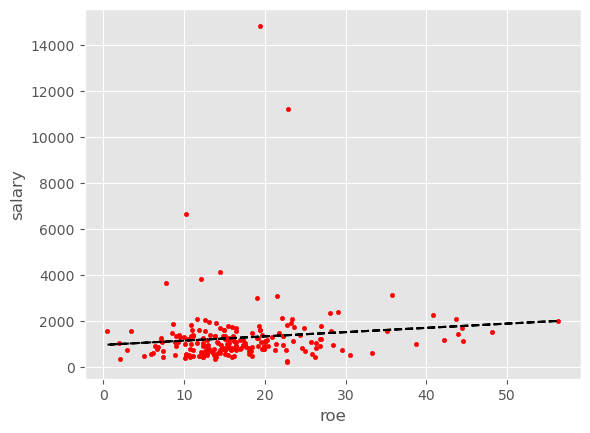

In [7]:
# scatter plot and fitted values:
plt.scatter('roe', 'salary', data=ceosal1, color='red', marker='.')
plt.plot(ceosal1['roe'], results.fittedvalues, color='black', linestyle='--') #usar propiedad fittedvalues para y_hat
plt.ylabel('salary')
plt.xlabel('roe')
plt.show()

# Wooldridge, Ejemplo 2.4

Para este ejemplo se usará el conjunto de datos <font color = red> WAGE1 </font>, tal cual lo hace el ejemplo 2.4 "Wage and Education":

$$\text{wage} = \beta_0 + \beta_1 \text{education} + u$$

donde $\text{wage}$ es el salario en dólares por hora de la fuerza laboral y $\text{education}$ son los años de educación.

In [24]:
# Importamos los datos
wage1 = woo.dataWoo('wage1')

In [25]:
# Regresion MCO
reg = smf.ols(formula='wage ~ educ', data=wage1) #instanciamos la clase
results = reg.fit() #usamos el método fit
b = results.params #usamos una propiedad
print(f'b: \n{b}\n')

b: 
Intercept   -0.904852
educ         0.541359
dtype: float64



La interpretación de estos resutados son sencillos, un año adicional de educación se asocia con un aumento del salario típico de aproximadamente 54 centavos por hora.

# Wooldridge, Ejemplo 2.5

De igual modo, para este ejemplo se usará el conjunto de datos <font color = red> VOTE1 </font>, tal cual lo hace el ejemplo 2.5 "Voting Outcomes and Campaign Expenditures":

$$\text{voteA} = \beta_0 + \beta_1 \text{shareA} + u$$

Sea $\text{voteA}$ el porcentaje de votos obtenidos por el candidato A y $\text{shareA}$ el porcentaje total de los gastos de campaña atribuido al candidato A.

In [28]:
# importamos los datos
vote1 = woo.dataWoo('vote1')

In [29]:
# regresion MCO
reg = smf.ols(formula='voteA ~ shareA', data=vote1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept    26.812214
shareA        0.463827
dtype: float64



Este resultado nos indica que si aumenta el gasto del candidato A en un punto porcentual, él obtendrá aproximadamente medio punto porcentual (0.4638) más del total de votos.

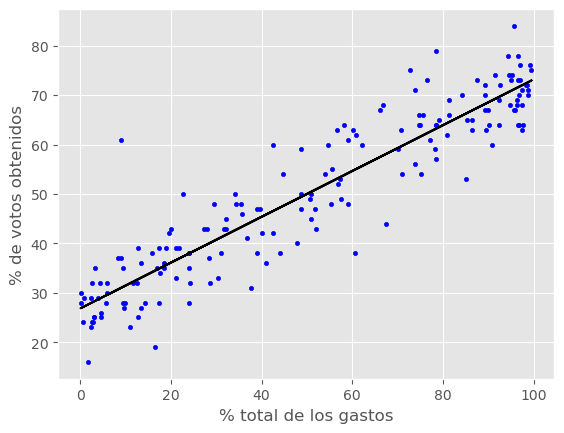

In [32]:
# Graficamos
plt.scatter('shareA', 'voteA', data= vote1, color='blue', marker='.')
plt.plot(vote1['shareA'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('% de votos obtenidos')
plt.xlabel('% total de los gastos')
plt.show()